In [1]:
using DIVAnd
using PyPlot
using NCDatasets
using Missings

using Random
using DelimitedFiles
using Statistics
using Printf
using FileIO

include("./DIVAnd_sediment.jl")

emodnet2nc

In [2]:
bathy2ncfile = "/data/EMODnet/Bathymetry/test01.asc"
lon, lat, depth = read_emodnet_bath(bathy2ncfile)

┌ Info: Number of lines: 139
└ @ Main /home/ctroupin/Projects/SedimentInter_Slovenia/DIVAnd_sediment.jl:53
┌ Info: Number of lines: 207
└ @ Main /home/ctroupin/Projects/SedimentInter_Slovenia/DIVAnd_sediment.jl:54
┌ Info: 207
└ @ Main /home/ctroupin/Projects/SedimentInter_Slovenia/DIVAnd_sediment.jl:67
┌ Info: 139
└ @ Main /home/ctroupin/Projects/SedimentInter_Slovenia/DIVAnd_sediment.jl:68


([1.1525344848632812, 1.1535761515332812, 1.1546178182032814, 1.1556594848732813, 1.1567011515432812, 1.1577428182132812, 1.1587844848832813, 1.1598261515532813, 1.1608678182232812, 1.1619094848932812  …  1.3577428188532812, 1.3587844855232813, 1.3598261521932813, 1.3608678188632812, 1.3619094855332812, 1.3629511522032813, 1.3639928188732813, 1.3650344855432812, 1.3660761522132812, 1.3671178188832813], [50.89210510253906, 50.89314676920906, 50.894188435879066, 50.895230102549064, 50.89627176921906, 50.89731343588906, 50.898355102559066, 50.899396769229064, 50.90043843589906, 50.90148010256906  …  51.02648010296906, 51.027521769639065, 51.028563436309064, 51.02960510297906, 51.03064676964906, 51.031688436319065, 51.03273010298906, 51.03377176965906, 51.03481343632906, 51.035855102999065], [32.599998474121094 33.400001525878906 … 46.79999923706055 47.20000076293945; 33.400001525878906 34.20000076293945 … 46.20000076293945 47.400001525878906; … ; 21.049999237060547 20.799999237060547 … 27

In [2]:
using Pkg
Pkg.status()

    Status `~/.julia/environments/v1.2/Project.toml`
  [c9ce4bd3] ArchGDAL v0.2.1
  [8f4d0f93] Conda v1.3.0
  [efc8151c] DIVAnd v2.4.0+ #JMB (https://github.com/gher-ulg/DIVAnd.jl.git)
  [5789e2e9] FileIO v1.0.7
  [5752ebe1] GMT v0.11.0
  [7073ff75] IJulia v1.20.0
  [86fae568] ImageView v0.9.0
  [a98d9a8b] Interpolations v0.12.2
  [e1d29d7a] Missings v0.4.2
  [85f8d34a] NCDatasets v0.9.2
  [91a5bcdd] Plots v0.26.3
  [438e738f] PyCall v1.91.2
  [d330b81b] PyPlot v2.8.1


In [37]:
datafile = "./data/GranulometrySlovenian.csv"
bathyfile = "./data/NorthAdriatic.nc"
isfile(datafile) ? @info("Data file already downloaded") : download("https://dox.ulg.ac.be/index.php/s/VzrZ4e8tY7SYims/download", datafile);
isfile(bathyfile) ? @info("Bathymetry file already downloaded") : download("https://dox.ulg.ac.be/index.php/s/w8IS0QAtApA62iv", bathyfile);

┌ Info: Data file already downloaded
└ @ Main In[37]:3
┌ Info: Bathymetry file already downloaded
└ @ Main In[37]:4


## Read data
Simple CSV file with the coordinates and the measured values of 3 types of sediments: sand, silt and clay.     

In [120]:
obslon, obslat, sand, silt, clay = read_granulo(datafile);

The sum of sand, silt and clay yields 100.

In [101]:
sedimentsum = sand + silt + clay;
@show (sedimentsum');

sedimentsum' = [100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.01 100.00000000000001 100.0 100.0 100.0 100.0 99.99 100.0 100.00000000000001 99.99999999999999 100.0 100.0 100.0 100.0 100.00000000000001 100.0 100.0]


In [102]:
i1 = findall(sedimentsum .== 99.99)[1];
i2 = findall(sedimentsum .== 100.01)[1];
@show i1, i2;

(i1, i2) = (64, 58)


## Prepare bathymetry and mask

In [103]:
Δlon = 0.0025;
Δlat = 0.0025;
gridlon = 13.45 : Δlon : 13.75
gridlat = 45.48 : Δlat : 45.62

bx, by, b = DIVAnd.load_bath(bathyfile,true,gridlon, gridlat);
xmask, ymask, mmask = DIVAnd.load_mask(bathyfile,true,gridlon, gridlat,[0]);
mmask = mmask[:,:,1]
@info size(mmask);

┌ Info: (121, 57)
└ @ Main In[103]:9


### Scatter plot of the data [check]

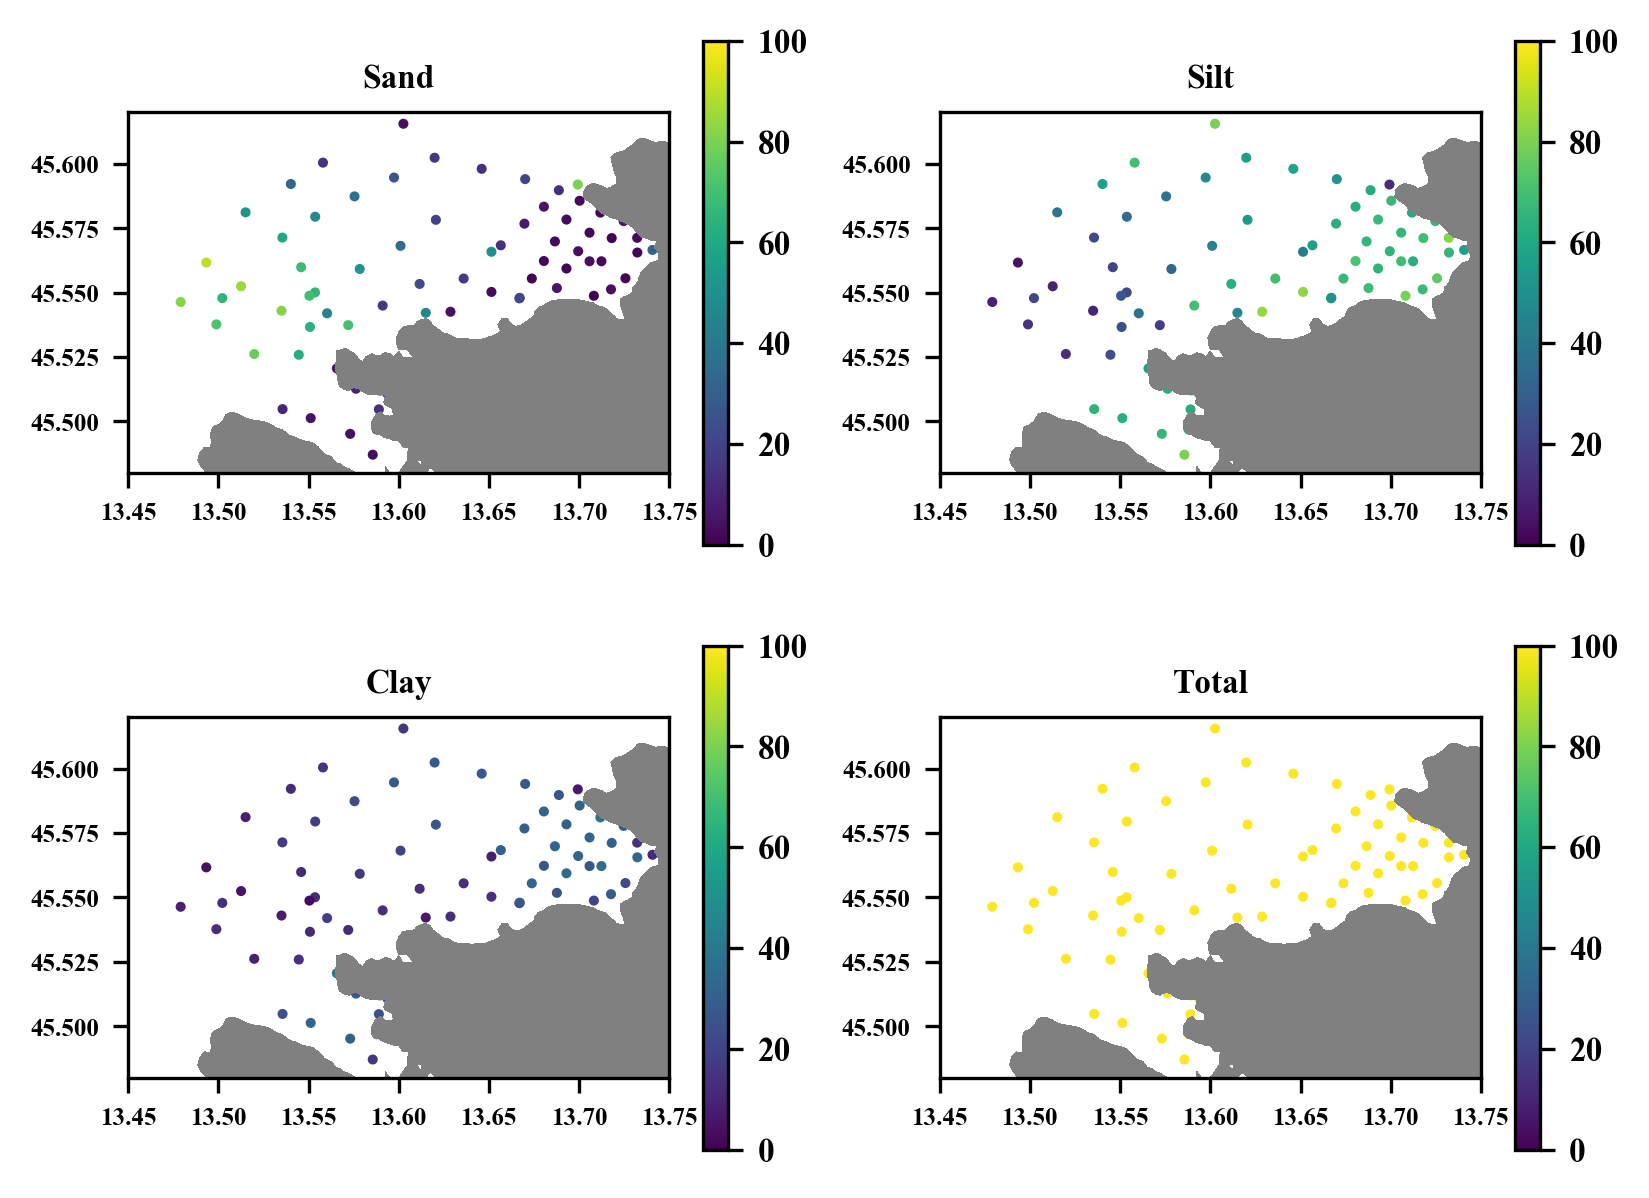

In [104]:
ax1 = subplot(2,2,1)
title("Sand", fontsize=8)
scat1 = PyPlot.scatter(obslon, obslat, s=2, c=sand, vmin=0., vmax=100.)
colorbar(scat1).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax1.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax2 = subplot(2,2,2)
title("Silt", fontsize=8)
scat2 = PyPlot.scatter(obslon, obslat, s=2, c=silt, vmin=0., vmax=100.)
colorbar(scat2).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax2.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax3 = subplot(2,2,3)
title("Clay", fontsize=8)
scat3 = PyPlot.scatter(obslon, obslat, s=2, c=clay, vmin=0., vmax=100.)
colorbar(scat3).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax3.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax4 = subplot(2,2,4)
title("Total", fontsize=8)
scat4 =PyPlot.scatter(obslon, obslat, s=2, c=clay+sand+silt, vmin=0., vmax=100.)
colorbar(scat4).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax4.tick_params("both", labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))
PyPlot.savefig("./figures/sediment_data01.png", dpi=300, bbox_inches="tight")

In [105]:
# Metrics
xi,yi = DIVAnd.ndgrid(gridlon, gridlat);
pm = ones(size(xi)) / (xi[2,1]-xi[1,1]);
pn = ones(size(xi)) / (yi[1,2]-yi[1,1]);

# Correlation length
len = 0.03;

# Observational error variance normalized by the background error variance
epsilon2 = 0.1;

## DIVAnd computations
### 1. Each field independently
#### 1.1. alphabc = 0

In [52]:
@time field_sand_0, s1 = DIVAnd.DIVAndrun(mmask[:,:,1],(pm,pn),(xi,yi),
        (obslon,obslat), sand .- mean(sand),len,epsilon2,alphabc=0);
@time field_silt_0, s2 = DIVAnd.DIVAndrun(mmask[:,:,1],(pm,pn),(xi,yi),
        (obslon,obslat), silt .- mean(silt),len,epsilon2,alphabc=0);
@time field_clay_0, s3 = DIVAnd.DIVAndrun(mmask[:,:,1],(pm,pn),(xi,yi),
        (obslon,obslat), clay .- mean(clay),len,epsilon2,alphabc=0);
total_0 = mean(sand) .+ permutedims(field_sand_0, [2,1]) .+ 
          mean(silt) .+ permutedims(field_silt_0, [2,1]) .+ 
          mean(clay) .+ permutedims(field_clay_0, [2,1]);

  0.088012 seconds (2.42 k allocations: 62.152 MiB, 37.73% gc time)
  0.175904 seconds (2.42 k allocations: 62.152 MiB, 72.07% gc time)
  0.059999 seconds (2.42 k allocations: 62.152 MiB, 9.17% gc time)


#### 1.2. alphabc = 2

In [ ]:
@time field_sand_2, s1 = DIVAnd.DIVAndrun(mmask[:,:,1],(pm,pn),(xi,yi),
        (obslon,obslat), sand .- mean(sand),len,epsilon2,alphabc=2);
@time field_silt_2, s2 = DIVAnd.DIVAndrun(mmask[:,:,1],(pm,pn),(xi,yi),
        (obslon,obslat), silt .- mean(silt),len,epsilon2,alphabc=2);
@time field_clay_2, s3 = DIVAnd.DIVAndrun(mmask[:,:,1],(pm,pn),(xi,yi),
        (obslon,obslat), clay .- mean(clay),len,epsilon2,alphabc=2);
total_2 = mean(sand) .+ permutedims(field_sand_2, [2,1]) .+ 
        mean(silt) .+ permutedims(field_silt_2, [2,1]) .+ 
        mean(clay) .+ permutedims(field_clay_2, [2,1]);

#### 1.3 Plots
The plot confirm that the sum can be above or below 100%.

In [60]:
@show mean(filter(!isnan, total_0));
@show mean(filter(!isnan, total_2));

mean(filter(!isnan, total_0)) = 99.99978727006234
mean(filter(!isnan, total_2)) = 99.99984590208138


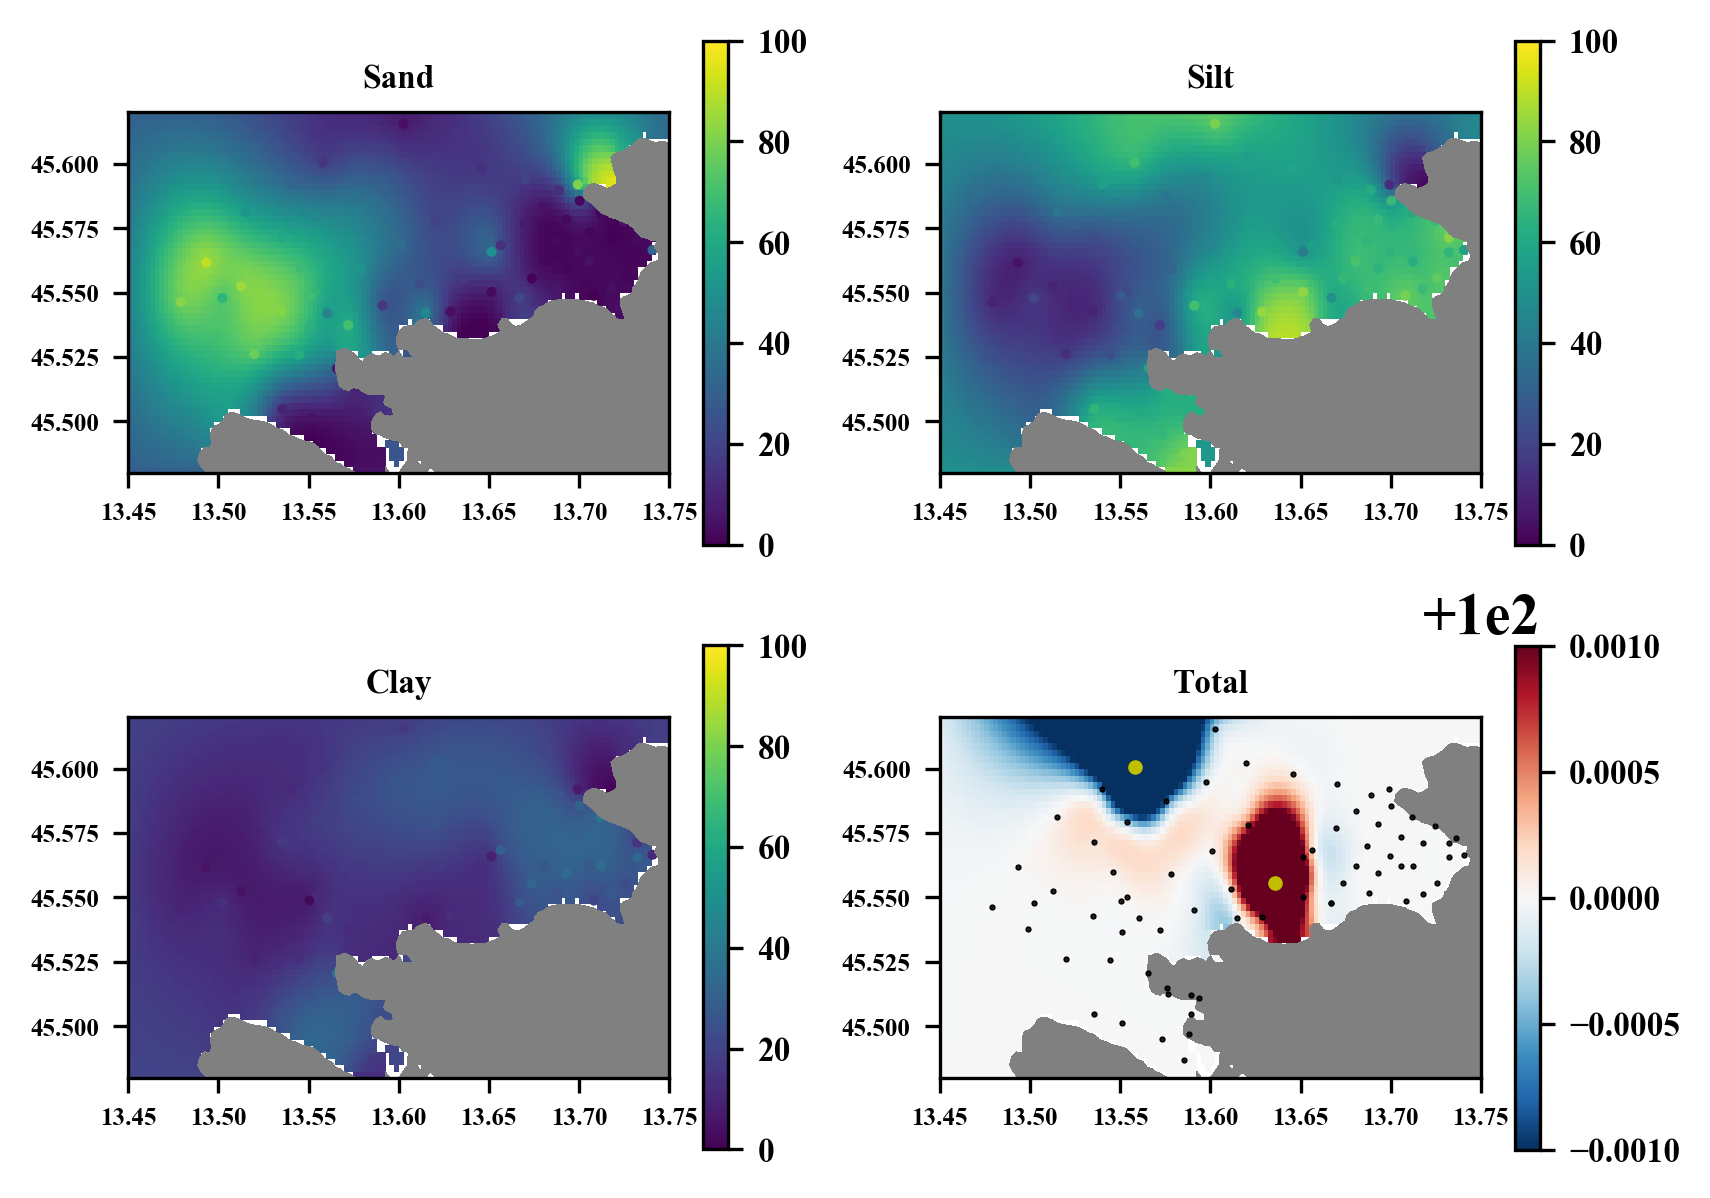

In [94]:
ax1 = subplot(2,2,1)
title("Sand", fontsize=8)
pcm1 = PyPlot.pcolormesh(gridlon, gridlat, mean(sand) .+ permutedims(field_sand_2, [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=sand, vmin=0., vmax=100.)
colorbar(pcm1).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax1.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax2 = subplot(2,2,2)
title("Silt", fontsize=8)
pcm2 = PyPlot.pcolormesh(gridlon, gridlat, mean(silt) .+ permutedims(field_silt_2, [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=silt, vmin=0., vmax=100.)
colorbar(pcm2).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax2.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax3 = subplot(2,2,3)
title("Clay", fontsize=8)
pcm3 = PyPlot.pcolormesh(gridlon, gridlat, mean(clay) .+ permutedims(field_clay_2, [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=clay, vmin=0., vmax=100.)
colorbar(pcm3).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax3.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax4 = subplot(2,2,4)
title("Total", fontsize=8)
pcm4 = PyPlot.pcolormesh(gridlon, gridlat, total_2, cmap=PyPlot.cm.RdBu_r, vmin=99.999, vmax=100.001)
PyPlot.plot(obslon, obslat, "ko", ms=0.5)
PyPlot.plot(obslon[i1], obslat[i1], "yo", ms=2.5)
PyPlot.plot(obslon[i2], obslat[i2], "yo", ms=2.5)
colorbar(pcm4).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax4.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))
# PyPlot.savefig("./figures/sediment_interp01_alphabc2.png", dpi=300, bbox_inches="tight")

#### Correcting the clay 
Sometimes the sum is not 100% and this propagates the error.

In [113]:
clay_corrected = 100. .- sand .- silt
@time field_clay_corr_2, s3 = DIVAnd.DIVAndrun(mmask[:,:,1],(pm,pn),(xi,yi),
        (obslon,obslat), clay_corrected .- mean(clay_corrected),len,epsilon2,alphabc=2);
total_2 = mean(sand) .+ permutedims(field_sand_2, [2,1]) .+ 
        mean(silt) .+ permutedims(field_silt_2, [2,1]) .+ 
        mean(clay) .+ permutedims(field_clay_corr_2, [2,1]);

  0.088728 seconds (2.81 k allocations: 62.426 MiB, 11.10% gc time)


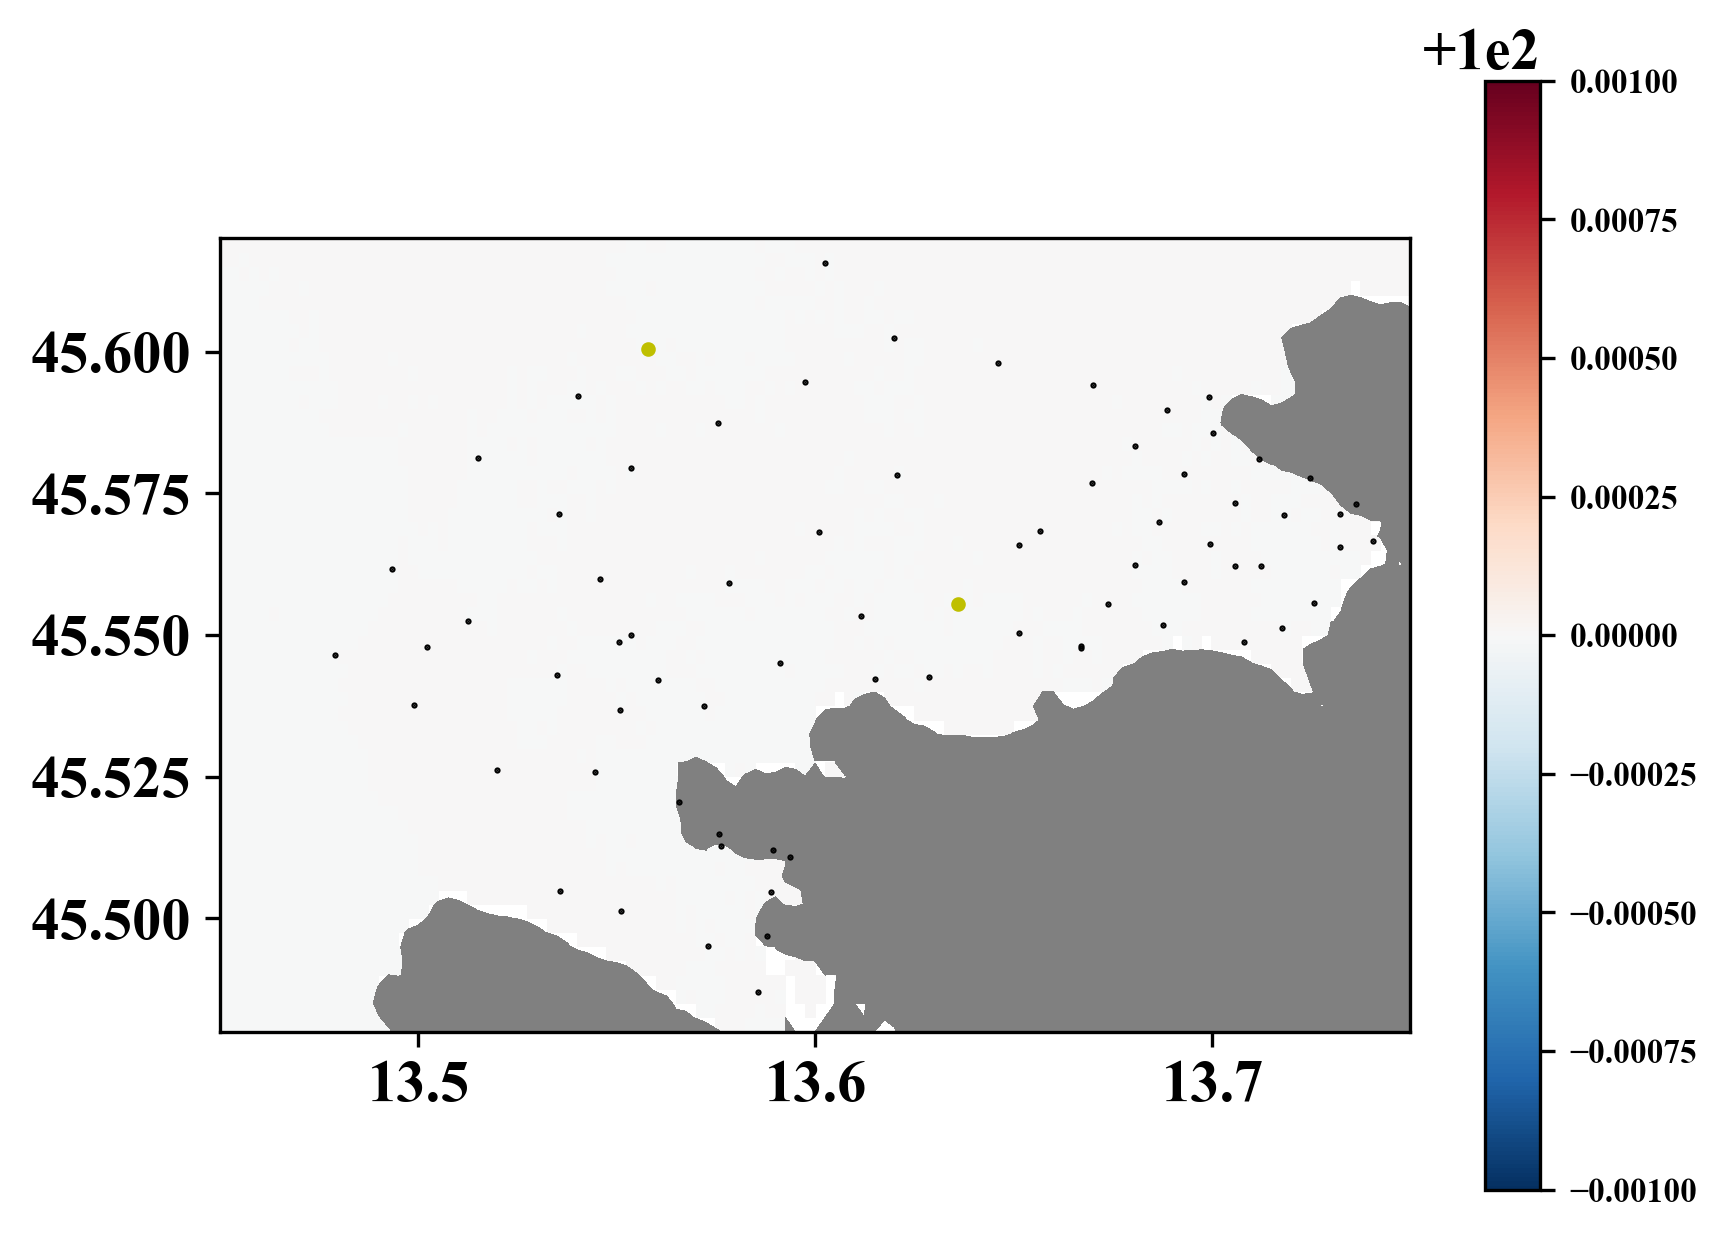

In [109]:
pcm = PyPlot.pcolormesh(gridlon, gridlat, total_2, cmap=PyPlot.cm.RdBu_r, vmin=99.999, vmax=100.001)
PyPlot.plot(obslon, obslat, "ko", ms=0.5)
PyPlot.plot(obslon[i1], obslat[i1], "yo", ms=2.5)
PyPlot.plot(obslon[i2], obslat[i2], "yo", ms=2.5)
colorbar(pcm).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

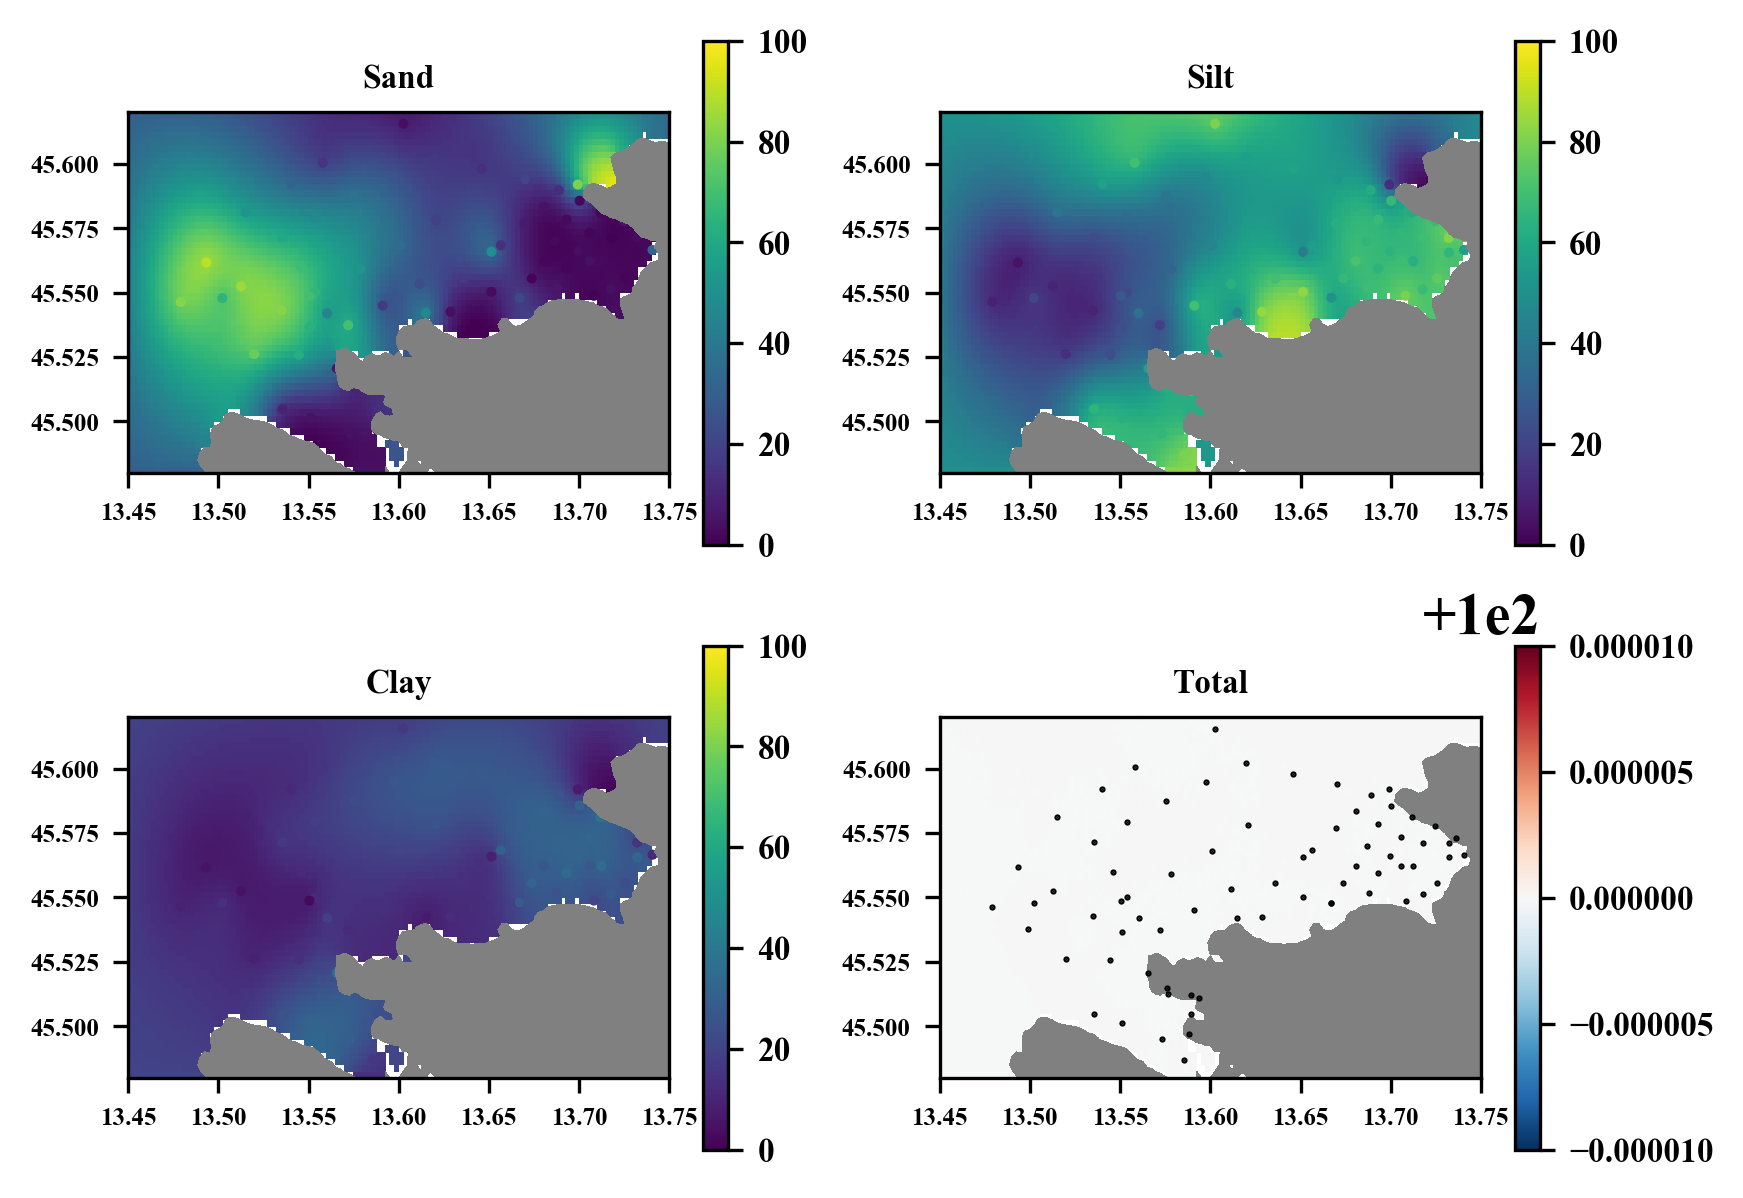

In [128]:
ax1 = subplot(2,2,1)
title("Sand", fontsize=8)
pcm1 = PyPlot.pcolormesh(gridlon, gridlat, mean(sand) .+ permutedims(field_sand_2, [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=sand, vmin=0., vmax=100.)
colorbar(pcm1).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax1.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax2 = subplot(2,2,2)
title("Silt", fontsize=8)
pcm2 = PyPlot.pcolormesh(gridlon, gridlat, mean(silt) .+ permutedims(field_silt_2, [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=silt, vmin=0., vmax=100.)
colorbar(pcm2).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax2.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax3 = subplot(2,2,3)
title("Clay", fontsize=8)
pcm3 = PyPlot.pcolormesh(gridlon, gridlat, mean(clay) .+ permutedims(field_clay_corr_2, [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=clay, vmin=0., vmax=100.)
colorbar(pcm3).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax3.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax4 = subplot(2,2,4)
title("Total", fontsize=8)
pcm4 = PyPlot.pcolormesh(gridlon, gridlat, total_2, cmap=PyPlot.cm.RdBu_r, vmin=99.99999, vmax=100.00001)
PyPlot.plot(obslon, obslat, "ko", ms=0.5)
colorbar(pcm4).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax4.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))
PyPlot.savefig("./figures/sediment_interp03_alphabc2.png", dpi=300, bbox_inches="tight")

### 2. The 3 fields together
We create a 3rd, artificial dimension to store the sediment measurements.

In [65]:
obslon2 = repeat(obslon, 1, 3)'[:]
obslat2 = repeat(obslat, 1, 3)'[:]
zzz = repeat([1., 2., 3.], length(obslat));
@info(length(zzz));

┌ Info: 222
└ @ Main In[65]:4


and then re-arrange the data values:

In [66]:
sedimentall = hcat(sand .- mean(sand), silt .- mean(silt), clay .- mean(clay))'[:];
@info(length(sedimentall))

┌ Info: 222
└ @ Main In[66]:2


Create the new grid, define the metrics and the mask

In [67]:
xxi, yyi, zzi = ndgrid(gridlon, gridlat, range(1.,stop=3.,step=1));
mask = trues(size(xxi));
pm = ones(size(xxi)) / (xxi[2,1,1] - xxi[1,1,1]);
pn = ones(size(xxi)) / (yyi[1,2,1] - yyi[1,1,1]);
pq = ones(size(xxi)) / (zzi[1,1,2] - zzi[1,1,1]);
mmask3 = repeat(mmask, 1, 1, 3);
@info(size(mmask3));

┌ Info: (121, 57, 3)
└ @ Main In[67]:7


Set the analysis parameters.     
The correlation length: set to zero for the last dimension

In [68]:
sz = size(mmask3);
lenx = fill(0.03,sz)   
leny = fill(0.03,sz) 
lenz = zeros(sz);      
len = (lenx, leny, lenz);

In [69]:
# fi is the interpolated field
fi_merged,s_merged = DIVAndrun(mmask3,(pm,pn,pq), (xxi, yyi, zzi),
    (obslon2,obslat2,zzz),sedimentall,len,epsilon2);

In [71]:
@show mean(filter(!isnan, sum(fi_merged, dims=3)[:,:,1]));

mean(filter(!isnan, (sum(fi_merged, dims=3))[:, :, 1])) = -0.00019321340782571387


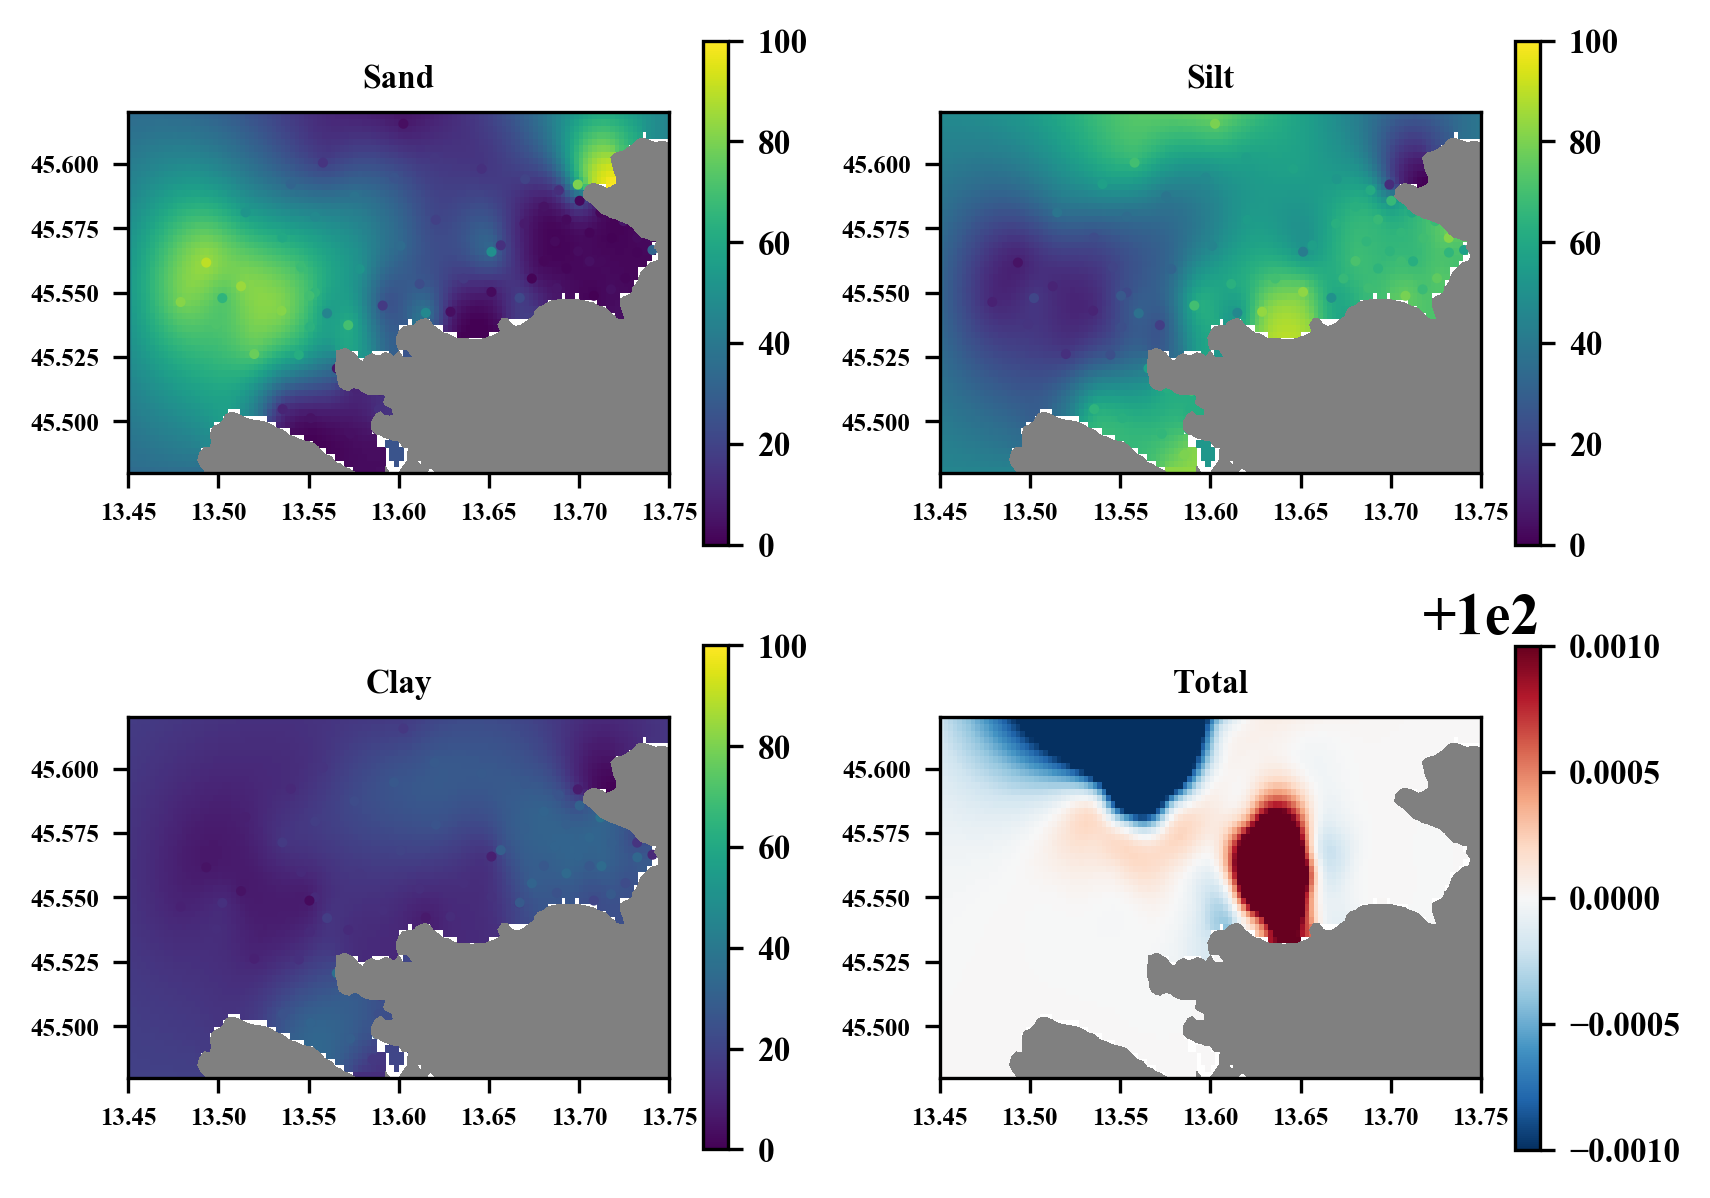

In [78]:
ax1 = subplot(2,2,1)
title("Sand", fontsize=8)
pcm1 = PyPlot.pcolormesh(gridlon, gridlat, mean(sand) .+ permutedims(fi_merged[:,:,1], [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=sand, vmin=0., vmax=100.)
colorbar(pcm1).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax1.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax2 = subplot(2,2,2)
title("Silt", fontsize=8)
pcm2 = PyPlot.pcolormesh(gridlon, gridlat, mean(silt) .+ permutedims(fi_merged[:,:,2], [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=silt, vmin=0., vmax=100.)
colorbar(pcm2).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax2.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax3 = subplot(2,2,3)
title("Clay", fontsize=8)
pcm3 = PyPlot.pcolormesh(gridlon, gridlat, mean(clay) .+ permutedims(fi_merged[:,:,3], [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=clay, vmin=0., vmax=100.)
colorbar(pcm3).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax3.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax4 = subplot(2,2,4)
title("Total", fontsize=8)
pcm4 = PyPlot.pcolormesh(gridlon, gridlat, 100 .+ sum(fi_merged, dims=3)[:,:,1]',
                         cmap=PyPlot.cm.RdBu_r, vmin=99.999, vmax=100.001)
colorbar(pcm4).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax4.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

# PyPlot.savefig("./figures/sediment_interp02.png", dpi=300, bbox_inches="tight")

### 3. The 3 fields together with the constrain

In [77]:
# fi is the interpolated field
fi_merged_2,s_merged_2 = DIVAndrun(mmask3,(pm,pn,pq), (xxi, yyi, zzi),
    (obslon2,obslat2,zzz),sedimentall,len,epsilon2; epsilon2forfractions=0.1);

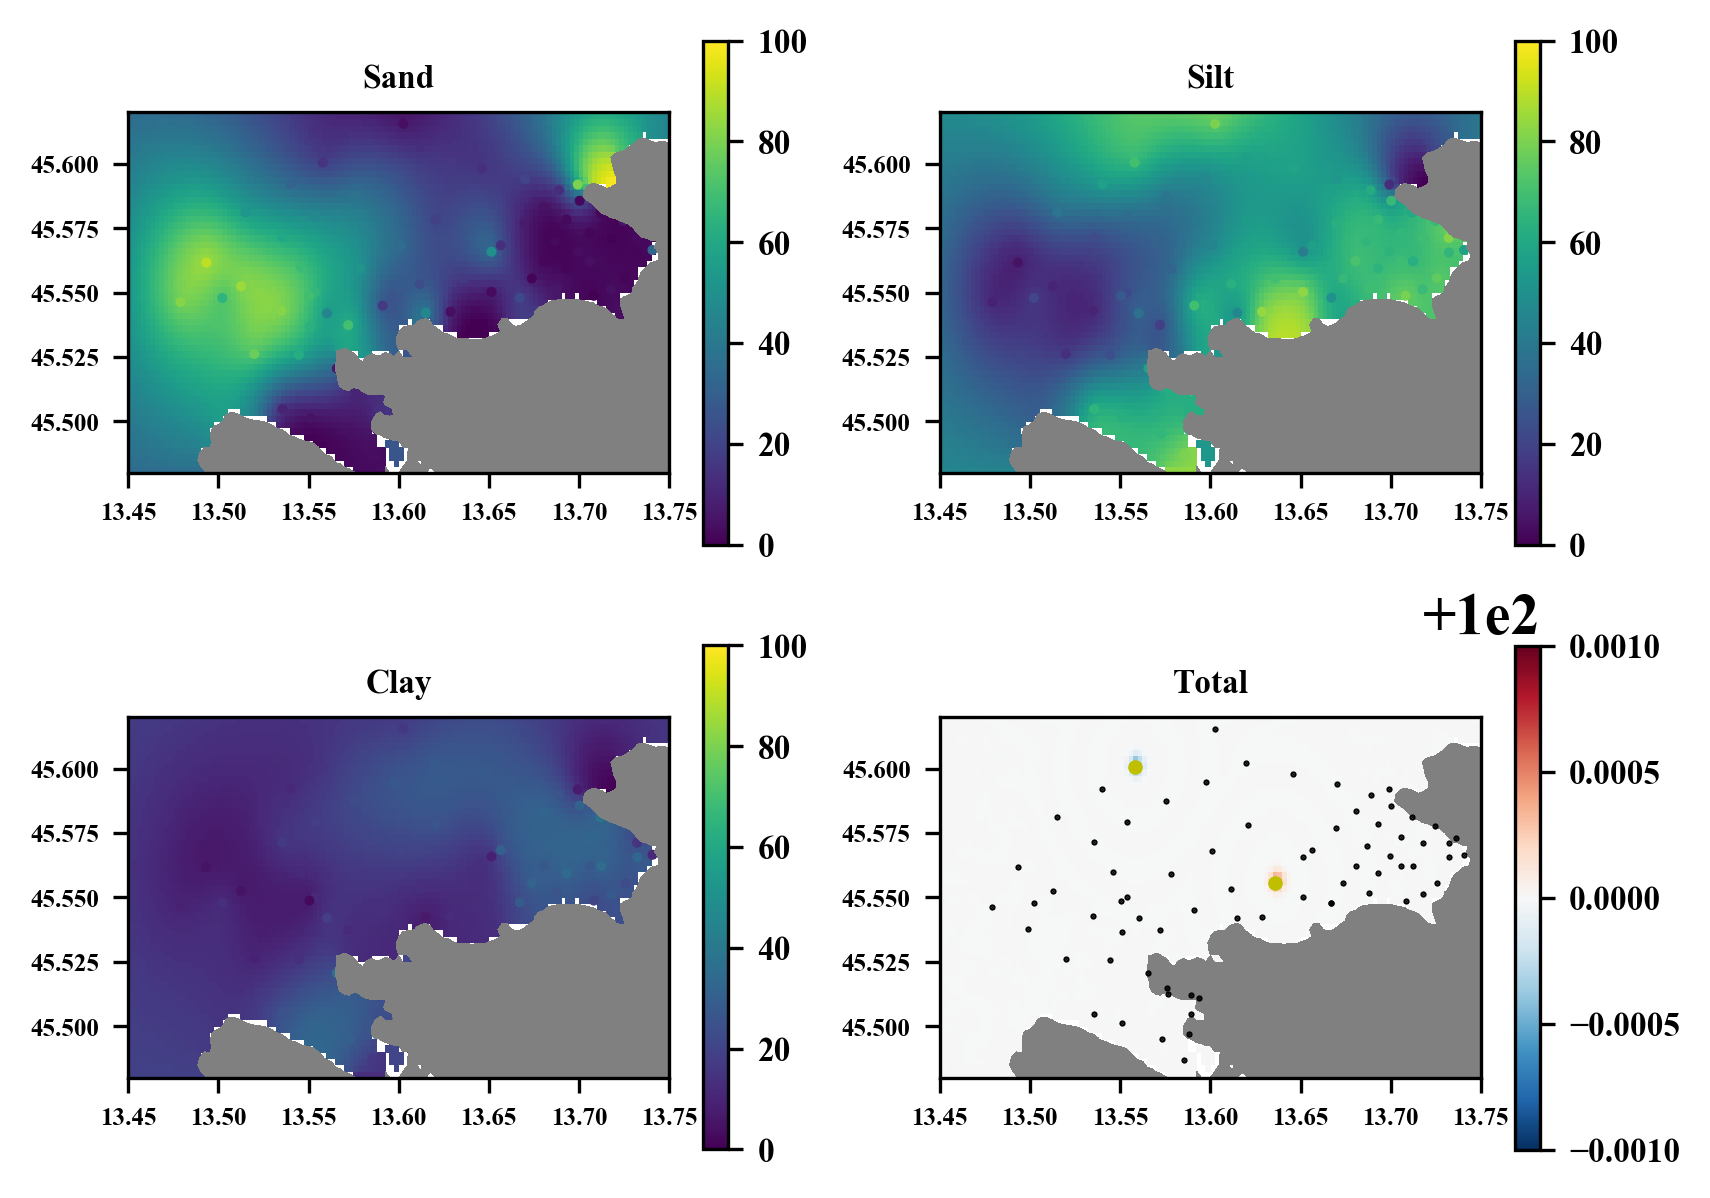

In [95]:
ax1 = subplot(2,2,1)
title("Sand", fontsize=8)
pcm1 = PyPlot.pcolormesh(gridlon, gridlat, mean(sand) .+ permutedims(fi_merged_2[:,:,1], [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=sand, vmin=0., vmax=100.)
colorbar(pcm1).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax1.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax2 = subplot(2,2,2)
title("Silt", fontsize=8)
pcm2 = PyPlot.pcolormesh(gridlon, gridlat, mean(silt) .+ permutedims(fi_merged_2[:,:,2], [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=silt, vmin=0., vmax=100.)
colorbar(pcm2).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax2.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax3 = subplot(2,2,3)
title("Clay", fontsize=8)
pcm3 = PyPlot.pcolormesh(gridlon, gridlat, mean(clay) .+ permutedims(fi_merged_2[:,:,3], [2,1]), vmin=0, vmax=100.)
PyPlot.scatter(obslon, obslat, s=2, c=clay, vmin=0., vmax=100.)
colorbar(pcm3).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax3.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

ax4 = subplot(2,2,4)
title("Total", fontsize=8)
pcm4 = PyPlot.pcolormesh(gridlon, gridlat, 100 .+ sum(fi_merged_2, dims=3)[:,:,1]',
                         cmap=PyPlot.cm.RdBu_r, vmin=99.999, vmax=100.001)
PyPlot.plot(obslon, obslat, "ko", ms=0.5)
PyPlot.plot(obslon[i1], obslat[i1], "yo", ms=2.5)
PyPlot.plot(obslon[i2], obslat[i2], "yo", ms=2.5)
colorbar(pcm4).ax.tick_params(labelsize=8)
add_mask(bx, by, b)
ax4.tick_params("both",labelsize=6)
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

# PyPlot.savefig("./figures/sediment_interp02.png", dpi=300, bbox_inches="tight")

### Classify according to fractions

In [123]:
sandval = 10.
clayval = 1.
if sandval >= 75.
    sedimenttype = "sand"
else
    if clayval >= 50.
        if sandval >= 0.5
            sedimenttype = "Clayey sand"
        else
            sedimenttype = "Clay"
        end
    else
        if siltval < 0.5
            sedimenttype = "Silty sand"
        elseif s
            
    end
end  

In [119]:
clay

74-element Array{Float64,1}:
 17.0 
 32.0 
 27.0 
 32.0 
 30.0 
 31.0 
 27.0 
 30.0 
 35.0 
 27.0 
 25.0 
 34.0 
 32.0 
  ⋮   
 11.64
 15.03
 16.3 
  2.7 
  7.1 
  6.9 
 14.98
 15.58
 23.01
 16.37
 15.87
 20.42